In [1]:
%pylab inline
import numpy as np
import pandas as pd
import os
import sys
sys.path.insert(0, '/home/jfm343/Documents/Delafossites/integration_delafossite/Modular')
# sys.path.insert(0, '/Users/juanmendezvalderrama/Documents/Proyectos/Delafossites/integration_delafossite/Modular')
import Dispersion
import Lattice
from scipy import linalg as la
import seaborn as sns
from scipy.optimize import curve_fit
from scipy import stats

Populating the interactive namespace from numpy and matplotlib


In [2]:
pathMAC="/Users/juanmendezvalderrama/Documents/Proyectos/Delafossites/integration_delafossite"
pathchow='/home/jfm343/Documents/Delafossites/integration_delafossite'
# pathpc='/home/juan/Documents/Projects/BM_bandstructure'
# pathy=pathMAC
pathy=pathchow

In [3]:
xilist=np.array([0.7977001437529434, 0.44769799421336715, 0.3385934132942712, 0.2820654445433112, 0.24641327783634667, 0.22140855357460135, 0.20266334949870196, 0.18795373910710966, 0.17602044681425916, 0.16609148193650858])

In [4]:
path=pathy+'/data/tempsweep_radial__2022-04-30-16-05-32'
# path=pathy+'/data/tempsweep_radial_mac__2022-05-01-22-48-29'
# path=pathy+'/data/tempsweep_diffpeak_2022-02-12-13-44-44'
subpaths=os.listdir(path)
subpaths=list(filter(lambda a: a != 'inforun', subpaths))
def getdatadir(fulpath):
    data=[]
    for pa in fulpath:
        if ('data' in pa): data.append(pa)
    return data
frames=[]
for i, pat in enumerate(subpaths):
    # print(pat)
    fulpath=path+'/'+pat
    subpaths2=os.listdir(fulpath)
    data= getdatadir(subpaths2)
    fullpath=fulpath+'/'+data[0]
    print("reading data ",fullpath)
    
    dff = pd.read_hdf(fullpath)
    frames.append(dff)
    
df=pd.concat(frames).sort_values(['theta', 'nu'])


reading data  /home/jfm343/Documents/Delafossites/integration_delafossite/data/tempsweep_radial__2022-04-30-16-05-32/tempsweep_radial__6/data2022-04-30-09-50-45.h5
reading data  /home/jfm343/Documents/Delafossites/integration_delafossite/data/tempsweep_radial__2022-04-30-16-05-32/tempsweep_radial__5/data2022-04-30-08-02-38.h5
reading data  /home/jfm343/Documents/Delafossites/integration_delafossite/data/tempsweep_radial__2022-04-30-16-05-32/tempsweep_radial__9/data2022-04-30-14-47-39.h5
reading data  /home/jfm343/Documents/Delafossites/integration_delafossite/data/tempsweep_radial__2022-04-30-16-05-32/tempsweep_radial__8/data2022-04-30-13-19-19.h5
reading data  /home/jfm343/Documents/Delafossites/integration_delafossite/data/tempsweep_radial__2022-04-30-16-05-32/tempsweep_radial__2/data2022-04-30-02-50-07.h5
reading data  /home/jfm343/Documents/Delafossites/integration_delafossite/data/tempsweep_radial__2022-04-30-16-05-32/tempsweep_radial__10/data2022-04-30-16-05-31.h5
reading data  /

[-2.61799388 -2.51327412 -2.40855437 -2.30383461 -2.19911486 -2.0943951 ]


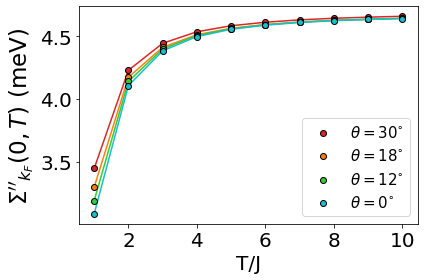

In [5]:

thets=df['theta'].unique()
print(thets)
df=df.sort_values(by=[ 'freq','T','theta'])
listcol=['tab:cyan','limegreen','tab:orange','tab:red']
listcol=listcol[::-1]
thets=np.array([thets[0],thets[2],thets[3],thets[5]])
thlabel=[30,18,12,0]
for l,th in enumerate(thets):
    df2=df.loc[(df['freq'] ==0 )&(df['theta'] ==th )]

    plot(df2['T'].loc[(df2['T'] <11 )],df2['SE'].loc[(df2['T'] <11 )],c=listcol[l], zorder=0)
    scatter(df2['T'].loc[(df2['T'] <11 )],df2['SE'].loc[(df2['T'] <11 )], edgecolor='k', label=r"$\theta =$"+str(thlabel[l])+r"$^{\circ}$", zorder=2, c=listcol[l])
    # plt.scatter(df2['T'],df2['SE'])
    xticks(size=20)
    yticks(size=20)
    pyplot.locator_params(axis='y', nbins=4)
    pyplot.locator_params(axis='x', nbins=7)
    legend(prop={'size': 15})
plt.xlabel('T/J', size=20)
plt.ylabel(r"$\Sigma''_{k_F}(0, T)$ (meV)", size=23)
plt.tight_layout()    
plt.savefig("imgs/pap_fig1b", dpi=400)
plt.show()
    # ax2 = df2.plot( x='freq',y='SE', c='nu',colormap='viridis', sharex=True, kind='scatter')

[-2.61799388 -2.51327412 -2.40855437 -2.30383461 -2.19911486 -2.0943951 ]
4.694408964643803
4.690577690113607
4.68405551952851
4.686240023478616


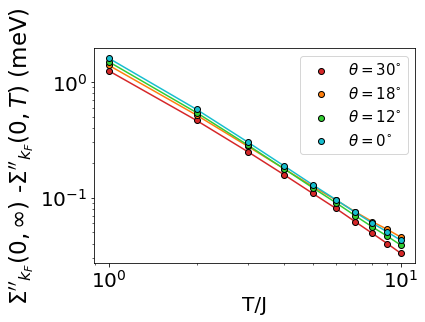

In [6]:

thets=df['theta'].unique()
print(thets)
df=df.sort_values(by=[ 'freq','T','theta'])
listcol=['tab:cyan','limegreen','tab:orange','tab:red']
listcol=listcol[::-1]
thets=np.array([thets[0],thets[2],thets[3],thets[5]])
thlabel=[30,18,12,0]
for l,th in enumerate(thets):
    df2=df.loc[(df['freq'] ==0 )&(df['theta'] ==th )]
    last=df2['SE'].iloc[-1]+0.01
    print(last)
    plot(df2['T'].loc[(df2['T'] <11 )],last-df2['SE'].loc[(df2['T'] <11 )],c=listcol[l], zorder=0)
    scatter(df2['T'].loc[(df2['T'] <11 )],last-df2['SE'].loc[(df2['T'] <11 )], edgecolor='k', label=r"$\theta =$"+str(thlabel[l])+r"$^{\circ}$", zorder=2, c=listcol[l])
    # plt.scatter(df2['T'],df2['SE'])
    xticks(size=20)
    yticks(size=20)
    pyplot.locator_params(axis='y', nbins=4)
    pyplot.locator_params(axis='x', nbins=7)
    legend(prop={'size': 15})
plt.yscale('log')
plt.xscale('log')
plt.xlabel('T/J', size=20)
plt.ylabel(r"$\Sigma''_{k_F}(0, \infty)$ -$\Sigma''_{k_F}(0, T)$ (meV)", size=23)
plt.tight_layout()    
plt.savefig("imgs/pap_fig1b", dpi=400)
plt.show()
    # ax2 = df2.plot( x='freq',y='SE', c='nu',colormap='viridis', sharex=True, kind='scatter')

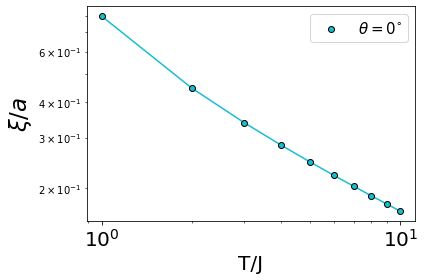

In [7]:

Tlist=np.arange(1,11,1)
xi=np.array(xilist)

plot(Tlist,xi,c=listcol[l], zorder=0)
scatter(Tlist,xi, edgecolor='k', label=r"$\theta =$"+str(thlabel[l])+r"$^{\circ}$", zorder=2, c=listcol[l])

xticks(size=20)
yticks(size=20)
pyplot.locator_params(axis='y', nbins=4)
pyplot.locator_params(axis='x', nbins=7)
legend(prop={'size': 15})
plt.yscale('log')
plt.xscale('log')
plt.xlabel('T/J', size=20)
plt.ylabel(r"$\xi /a$", size=23)
plt.tight_layout()    
plt.savefig("imgs/pap_fig1b", dpi=400)
plt.show()
    # ax2 = df2.plot( x='freq',y='SE', c='nu',colormap='viridis', sharex=True, kind='scatter')

In [8]:
lamblist=np.array([4.178642027077301, 3.370944783098885, 3.1806350971738353, 3.106684811722399, 3.0703759314285626, 3.0498886949148036, 3.037203270341933, 3.028807008086399, 3.0229631820378184, 3.018732903302169])

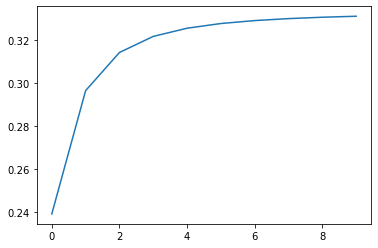

In [9]:
plt.plot(1/lamblist)

[-2.61799388 -2.51327412 -2.40855437 -2.30383461 -2.19911486 -2.0943951 ]


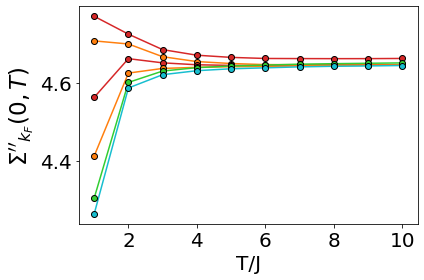

In [10]:

thets=df['theta'].unique()
print(thets)
df=df.sort_values(by=[ 'freq','T','theta'])
listcol=['tab:cyan','limegreen','tab:orange','tab:red']
listcol=['tab:cyan','limegreen','tab:orange','tab:red','tab:orange','tab:red']
listcol=listcol[::-1]
# thets=np.array([thets[0],thets[2],thets[3],thets[5]])
thlabel2=[30,18,12,0]
thlabel=[30,24,18,12,6,0]
for l,th in enumerate(thets):
    df2=df.loc[(df['freq'] ==0 )&(df['theta'] ==th )]
    TTs=np.array(df2['T'].loc[(df2['T'] <11 )])
    SEs=np.array(df2['SE'].loc[(df2['T'] <11 )])
    plot(TTs,SEs*lamblist/lamblist[-1],c=listcol[l], zorder=0)
    scatter(TTs,SEs*lamblist/lamblist[-1], edgecolor='k', label=r"$\theta =$"+str(thlabel[l])+r"$^{\circ}$", zorder=2, c=listcol[l])
    # plt.scatter(df2['T'],df2['SE'])
    xticks(size=20)
    yticks(size=20)
    # plt.ylim(2.5,3.5)
    pyplot.locator_params(axis='y', nbins=4)
    pyplot.locator_params(axis='x', nbins=7)
    # legend(prop={'size': 15})
plt.xlabel('T/J', size=20)
plt.ylabel(r"$\Sigma''_{k_F}(0, T)$", size=23)
plt.tight_layout()    
plt.savefig("imgs/pap_fig1b", dpi=400)
plt.show()
    # ax2 = df2.plot( x='freq',y='SE', c='nu',colormap='viridis', sharex=True, kind='scatter')

[-2.61799388 -2.51327412 -2.40855437 -2.30383461 -2.19911486 -2.0943951 ]
[-2.61799388 -2.51327412 -2.40855437 -2.30383461 -2.19911486 -2.0943951 ]


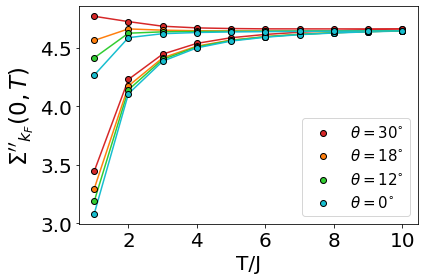

In [11]:

thets=df['theta'].unique()
print(thets)
df=df.sort_values(by=[ 'freq','T','theta'])
listcol=['tab:cyan','limegreen','tab:orange','tab:red']
listcol=listcol[::-1]
thets=np.array([thets[0],thets[2],thets[3],thets[5]])
thlabel=[30,18,12,0]
for l,th in enumerate(thets):
    df2=df.loc[(df['freq'] ==0 )&(df['theta'] ==th )]

    plot(df2['T'].loc[(df2['T'] <11 )],df2['SE'].loc[(df2['T'] <11 )],c=listcol[l], zorder=0)
    scatter(df2['T'].loc[(df2['T'] <11 )],df2['SE'].loc[(df2['T'] <11 )], edgecolor='k', label=r"$\theta =$"+str(thlabel[l])+r"$^{\circ}$", zorder=2, c=listcol[l])
    # plt.scatter(df2['T'],df2['SE'])
    xticks(size=20)
    yticks(size=20)
    pyplot.locator_params(axis='y', nbins=4)
    pyplot.locator_params(axis='x', nbins=7)
    legend(prop={'size': 15})
plt.xlabel('T/J', size=20)
plt.ylabel(r"$\Sigma''_{k_F}(0, T)$ (meV)", size=23)
plt.tight_layout()    
# plt.savefig("imgs/pap_fig1b", dpi=400)
# plt.show()
thets=df['theta'].unique()
print(thets)
df=df.sort_values(by=[ 'freq','T','theta'])
listcol=['tab:cyan','limegreen','tab:orange','tab:red']
listcol2=['tab:cyan','limegreen','tab:orange','tab:red','tab:orange','tab:red']
listcol=listcol[::-1]
thets=np.array([thets[0],thets[2],thets[3],thets[5]])
thlabel=[30,18,12,0]
thlabel2=[30,24,18,12,6,0]
for l,th in enumerate(thets):
    df2=df.loc[(df['freq'] ==0 )&(df['theta'] ==th )]
    TTs=np.array(df2['T'].loc[(df2['T'] <11 )])
    SEs=np.array(df2['SE'].loc[(df2['T'] <11 )])
    plot(TTs,SEs*lamblist/lamblist[-1],c=listcol[l], zorder=0)
    scatter(TTs,SEs*lamblist/lamblist[-1], edgecolor='k', label=r"$\theta =$"+str(thlabel[l])+r"$^{\circ}$", zorder=2, c=listcol[l])
    # plt.scatter(df2['T'],df2['SE'])
    xticks(size=20)
    yticks(size=20)
    # plt.ylim(2.5,3.5)
    pyplot.locator_params(axis='y', nbins=4)
    pyplot.locator_params(axis='x', nbins=7)
    # legend(prop={'size': 15})
plt.xlabel('T/J', size=20)
plt.ylabel(r"$\Sigma''_{k_F}(0, T)$", size=23)
plt.tight_layout()    
plt.savefig("imgs/pap_fig1b", dpi=400)
plt.show()
    # ax2 = df2.plot( x='freq',y='SE', c='nu',colormap='viridis', sharex=True, kind='scatter')

[-2.61799388 -2.51327412 -2.40855437 -2.30383461 -2.19911486 -2.0943951 ]
[-2.61799388 -2.51327412 -2.40855437 -2.30383461 -2.19911486 -2.0943951 ]


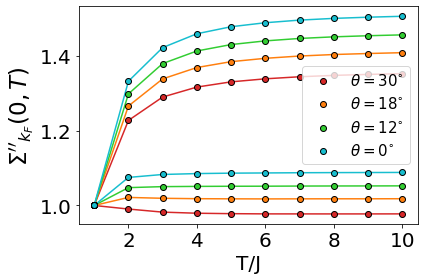

In [12]:

thets=df['theta'].unique()
print(thets)
df=df.sort_values(by=[ 'freq','T','theta'])
listcol=['tab:cyan','limegreen','tab:orange','tab:red']
listcol=listcol[::-1]
thets=np.array([thets[0],thets[2],thets[3],thets[5]])
thlabel=[30,18,12,0]
for l,th in enumerate(thets):
    df2=df.loc[(df['freq'] ==0 )&(df['theta'] ==th )]
    TTs=np.array(df2['T'].loc[(df2['T'] <11 )])
    SEs=np.array(df2['SE'].loc[(df2['T'] <11 )])
    plot(TTs,SEs/SEs[0],c=listcol[l], zorder=0)
    scatter(TTs,SEs/SEs[0], edgecolor='k', label=r"$\theta =$"+str(thlabel[l])+r"$^{\circ}$", zorder=2, c=listcol[l])
    # plt.scatter(df2['T'],df2['SE'])
    xticks(size=20)
    yticks(size=20)
    pyplot.locator_params(axis='y', nbins=4)
    pyplot.locator_params(axis='x', nbins=7)
    legend(prop={'size': 15})
plt.xlabel('T/J', size=20)
plt.ylabel(r"$\Sigma''_{k_F}(0, T)$ (meV)", size=23)
plt.tight_layout()    
# plt.savefig("imgs/pap_fig1b", dpi=400)
# plt.show()
thets=df['theta'].unique()
print(thets)
df=df.sort_values(by=[ 'freq','T','theta'])
listcol=['tab:cyan','limegreen','tab:orange','tab:red']
listcol2=['tab:cyan','limegreen','tab:orange','tab:red','tab:orange','tab:red']
listcol=listcol[::-1]
thets=np.array([thets[0],thets[2],thets[3],thets[5]])
thlabel=[30,18,12,0]
thlabel2=[30,24,18,12,6,0]
for l,th in enumerate(thets):
    df2=df.loc[(df['freq'] ==0 )&(df['theta'] ==th )]
    TTs=np.array(df2['T'].loc[(df2['T'] <11 )])
    SEs=np.array(df2['SE'].loc[(df2['T'] <11 )])
    plot(TTs,(SEs/SEs[0])*lamblist/lamblist[0],c=listcol[l], zorder=0)
    scatter(TTs,(SEs/SEs[0])*lamblist/lamblist[0], edgecolor='k', label=r"$\theta =$"+str(thlabel[l])+r"$^{\circ}$", zorder=2, c=listcol[l])
    # plt.scatter(df2['T'],df2['SE'])
    xticks(size=20)
    yticks(size=20)
    # plt.ylim(2.5,3.5)
    pyplot.locator_params(axis='y', nbins=4)
    pyplot.locator_params(axis='x', nbins=7)
    # legend(prop={'size': 15})
plt.xlabel('T/J', size=20)
plt.ylabel(r"$\Sigma''_{k_F}(0, T)$", size=23)
plt.tight_layout()    
plt.savefig("imgs/pap_fig1b", dpi=400)
plt.show()
    # ax2 = df2.plot( x='freq',y='SE', c='nu',colormap='viridis', sharex=True, kind='scatter')

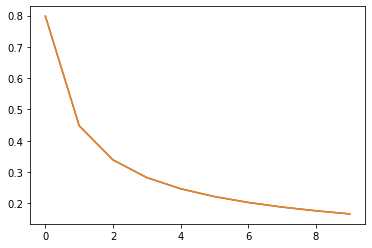

In [13]:
plot(xilist)
alpha=lamblist-3/Tlist
xi=np.sqrt(3/(4*Tlist*alpha))
plot(xi)

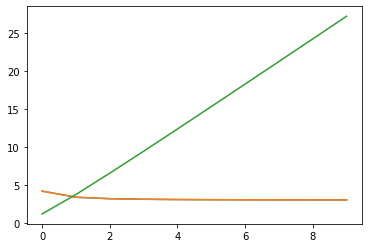

In [14]:
plot(lamblist)
alpha=lamblist-3/Tlist
xi=np.sqrt(3/(4*Tlist*alpha))
plot((3/4)*(1/xilist**2)/Tlist+3/Tlist)
plot((3/4)*(1/xilist**2) )

In [15]:
1/3.5


0.2857142857142857

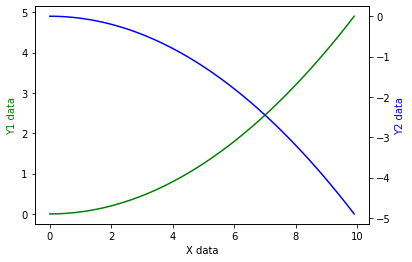

In [16]:
import numpy as np
import matplotlib.pyplot as plt
x = np.arange(0, 10, 0.1)
y1 = 0.05 * x**2
y2 = -1 *y1

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(x, y1, 'g-')
ax2.plot(x, y2, 'b-')

ax1.set_xlabel('X data')
ax1.set_ylabel('Y1 data', color='g')
ax2.set_ylabel('Y2 data', color='b')

plt.show()


[-2.61799388 -2.51327412 -2.40855437 -2.30383461 -2.19911486 -2.0943951 ]


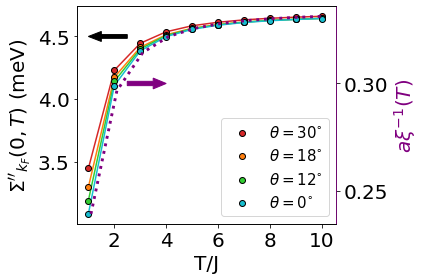

In [17]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

thets=df['theta'].unique()
print(thets)
df=df.sort_values(by=[ 'freq','T','theta'])
listcol=['tab:cyan','limegreen','tab:orange','tab:red']
listcol=listcol[::-1]
thets=np.array([thets[0],thets[2],thets[3],thets[5]])
thlabel=[30,18,12,0]


for l,th in enumerate(thets):
    df2=df.loc[(df['freq'] ==0 )&(df['theta'] ==th )]

    ax1.plot(df2['T'].loc[(df2['T'] <11 )],df2['SE'].loc[(df2['T'] <11 )],c=listcol[l], zorder=0)
    ax1.scatter(df2['T'].loc[(df2['T'] <11 )],df2['SE'].loc[(df2['T'] <11 )], edgecolor='k', label=r"$\theta =$"+str(thlabel[l])+r"$^{\circ}$", zorder=2, c=listcol[l])
    # plt.scatter(df2['T'],df2['SE'])
    ax1.tick_params(axis='both', which='major', labelsize=20)
    ax1.tick_params(axis='both', which='minor', labelsize=20)
    pyplot.locator_params(axis='y', nbins=4)
    pyplot.locator_params(axis='x', nbins=7)
    ax1.legend(prop={'size': 15})
ax1.set_xlabel('T/J', size=20)
ax1.set_ylabel(r"$\Sigma''_{k_F}(0, T)$ (meV)", size=20)

TTs=np.arange(1,11,1)

ax2.plot(TTs+0.1,1/lamblist, c='purple',ls=':', lw=2.9)
ax2.tick_params(axis='y', which='major', labelsize=20)
ax2.tick_params(axis='y', which='minor', labelsize=20)
ax2.spines['right'].set_color('purple')
ax2.set_ylabel(r'$a\xi^{-1}(T)$',  size=20, color='purple')
ax2.arrow(2.5, 0.3, 1, 0,head_width = 0.005, head_length=0.5,width = 0.002,ec ='purple', color='purple')
ax1.arrow(2.5,4.5, -1, 0,head_width = 0.08, head_length=0.5,width = 0.03,ec ='black', color='black')


plt.tight_layout()    
plt.savefig("imgs/pap_fig1b", dpi=400)
plt.show()